# Clustering of water-jets in Yellowstone National Park (K-Means, Elbow Method, Silhouette Analysis)
### The purpose of [clustering analysis, or clustering](https://en.wikipedia.org/wiki/Cluster_analysis) is to search for groups (clusters) in our data so that the members of a group are as homogeneous as possible becomes, and the more heterogeneous it becomes from the members of the other groups.

In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

* There are several ways of clustering.

* Perhaps the most widespread is [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering).

* The k-means algorithm is an iterative algorithm, which tries to find the optimal partition into clusters based on the *center* of each cluster.

* The centers of the clusters are called *centroids*.

* Clustering is an unsupervised learning method.

* We do not know in advance is not a correct answer for the group to which each sample belongs.

* What we need to choose is the number of clusters.

* Our first example will be measurements from [Old Faithfull](https://en.wikipedia.org/wiki/Old_Faithful), a geyser in Yellowstone National Park in Wyoming.

* The water jets that erupt from it appear every 44 to 125 minutes.

* Data taken from work by Azzalini, A. and Bowman, A. W. (1990). A look at some data on the Old Faithful geyser. Applied Statistics, 39, 357–365. doi: 10.2307/2347385, which is available as an R package.

In [2]:
import statsmodels.api as sm

geyser = sm.datasets.get_rdataset(dataname='geyser', package='MASS')
geyser.data

,waiting,duration
0,80,4.016667
1,71,2.150000
2,57,4.000000
3,80,4.000000
4,75,4.000000
...,...,...
294,52,4.083333
295,85,2.066667
296,58,4.000000
297,88,4.000000


* A diagram will give us a first idea of ​​the time between each jet and the duration of the jet.

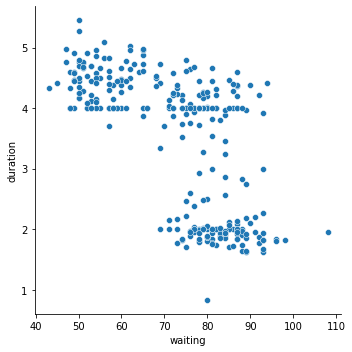

In [3]:
sns.relplot(x='waiting', y='duration', data=geyser.data)

* The k-means algorithm is available through the `KMeans` class in scikit-learn.

* We give the desired number of clusters.

* We call the `fit()` method.

* The coordinates of the centroids are given by the `cluster_centers_` property.

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(geyser.data)
kmeans.cluster_centers_

array([[81.31794872,  2.94324786],
       [55.43269231,  4.43125   ]])

* The `labels_` property gives us the label, i.e. the cluster to which each observation belongs.

In [5]:
kmeans.labels_[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

* Alternatively we can train our model and get the data clusters with the `fit_predict()` method.

* If we then want to get the clusters of other data (beyond training), we use the `predict()` method.

In [6]:
labels = kmeans.fit_predict(geyser.data)
np.array_equal(labels, kmeans.labels_)

True

* If we visualize the two clusters, we find that the result is not ideal.

* For example, why have a cluster that extends vertically, instead of another that extends horizontally?

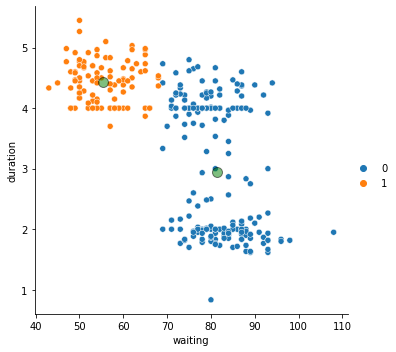

In [7]:
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=geyser.data)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='green', edgecolor='black', alpha=0.5, s=100)

* Let's increase the number of clusters.

* We see the results getting worse...

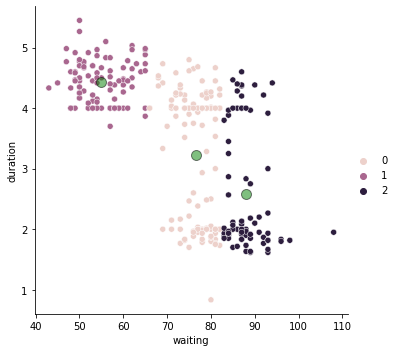

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(geyser.data)
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=geyser.data)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='green', edgecolor='black', s=100, alpha=0.5)

* The k-means algorithm does not work well if the features of our data have different variance.

* Let's see what happens.

In [9]:
geyser.data.describe()

,waiting,duration
count,299.000000,299.000000
mean,72.314381,3.460814
std,13.890324,1.147904
min,43.000000,0.833333
25%,59.000000,2.000000
50%,76.000000,4.000000
75%,83.000000,4.383333
max,108.000000,5.450000


* We will use our familiar `StandardScaler()` to ensure that all features have the same variance.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(geyser.data)
scaled_geyser = pd.DataFrame(X, index=geyser.data.index, 
                             columns=geyser.data.columns)
scaled_geyser

,waiting,duration
0,0.554235,0.485045
1,-0.094784,-1.143834
2,-1.104370,0.470501
3,0.554235,0.470501
4,0.193669,0.470501
...,...,...
294,-1.464936,0.543219
295,0.914801,-1.216552
296,-1.032257,0.470501
297,1.131141,0.470501


* Now let's see what we get if we ask for two clusters.

<Figure size 432x288 with 0 Axes>

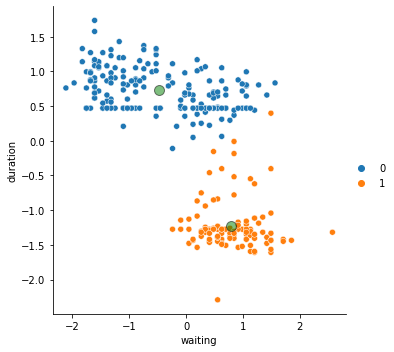

In [11]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(scaled_geyser)
plt.figure()
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=scaled_geyser)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='green', edgecolor='black', s=100, alpha=0.5)

* And with 3 clusters.

<Figure size 432x288 with 0 Axes>

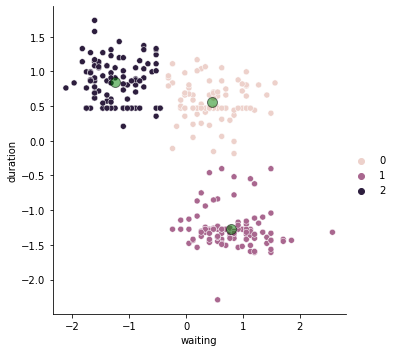

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_geyser)
plt.figure()
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=scaled_geyser)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='green', edgecolor='black', s=100, alpha=0.5)

* To find the optimal number of clusters we can use the *elbow method*.

* We construct a diagram with the number of clusters on the $x$ axis and the sum of the squares of the distances of each sample from the centroid of its group (the *distortion metric*, distortion score) on the $y$ axis.

* The diagram will look like an arm, so the bend gives us the optimal number of clusters.

* To build the diagram we will use the [yellowbrick](https://www.scikit-yb.org/en/latest/index.html) library.

* Displays two lines, one with the distortion metric and one with the time it takes to train each model.

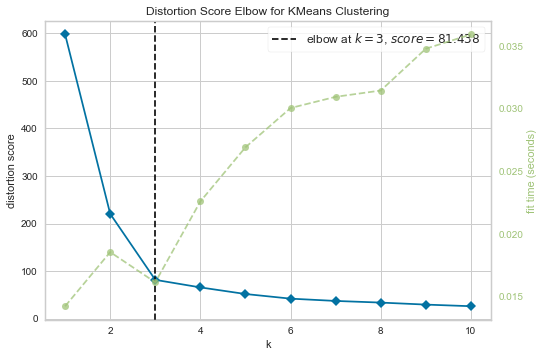

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(scaled_geyser)
visualizer.show()

* There is another, alternative method, [silhouette analysis](https://en.wikipedia.org/wiki/Silhouette_(clustering)) that can help us identify the optimal number of clusters.

* For each point $i$ of the cluster $C_{k}$ we define:

 $$ a(i)={\frac {1}{|C_{k}|-1}}\sum _{j \in C_{k},i\neq j}d(i,j)$$

 the average distance from the other points of the cluster $C_k$, where $d(i, j)$ is the distance between two points $i$ and $j$.

* $a(i)$ measures how well point $i$ fits into the cluster. The smaller it is, the more it fits into the cluster.

* For each point $i$ of the cluster $C_{k}$ we also define:

 $$ b(i)=\min _{q\neq k}{\frac {1}{|C_{q}|}}\sum _{j\in C_{q}}d(i,j)$$

* That is, we calculate the average distance from $i$ to the other clusters, and $b(i)$ is the shortest distance, i.e. the distance to the nearest cluster it *doesn't* belong to.

* $b(i)$ is therefore the distance to the least dissimilar cluster, which is called the *neighbor cluster* of $i$.

* We then define the silhouette value of point $i$:

 $$ s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}}, \quad \textrm{if } |C_{ k}| > 1$$

 and:

 $$ s(i)=0 , \quad \textrm{if } |C_{k}| = 1$$

* $s(i)$ ranges from $[-1, 1]$.

* If $s(i)$ is close to $+1$, then the point is far from the neighboring cluster (and thus the others).

* If $s(i) = 0$, then the point is on the border with the neighboring cluster.

* If $s(i) < 0$, then the point may be in the wrong cluster.

* Once we have $s(i)$ for each $i$, we calculate the *average silhouette metric* for all points.

* We choose the number of clusters that gives us the maximum average silhouette metric.

* We can visualize silhouette metrics by plotting the metric for each point, along with the average

* So we can see how many points are in the correct cluster and how many are not.

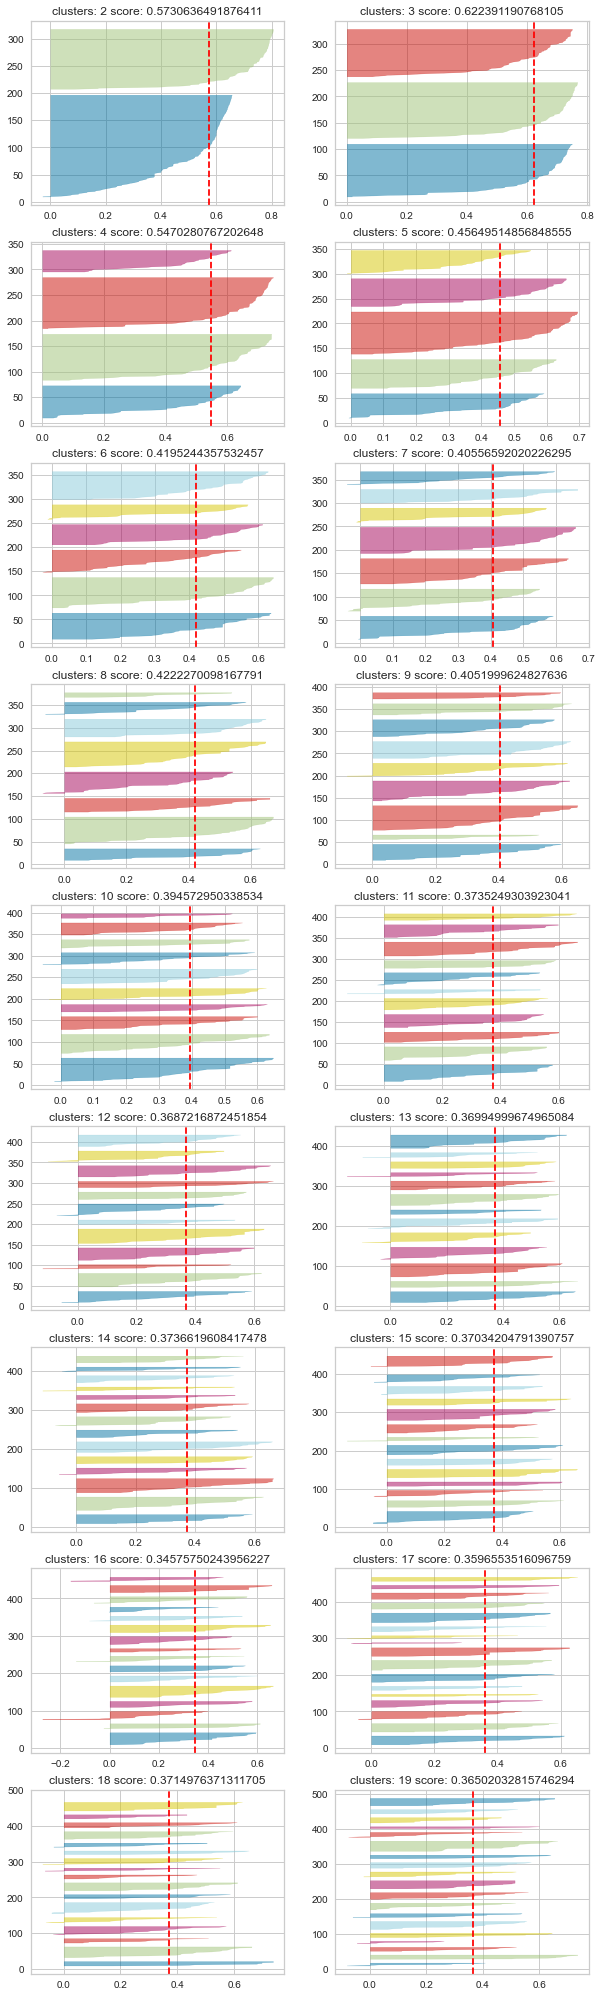

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer

plt.figure(figsize=(2 * 5,  10 * 4))

scores = {}
for n_clusters in range(2, 20):
    plt.subplot(10, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(scaled_geyser)
    scores[n_clusters] = visualizer.silhouette_score_
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

* To find the optimal number of clusters, it is enough to sort the metrics in descending order.

In [16]:
sorted(scores.items(), key=lambda kv: kv[1], reverse=True)

[(3, 0.622391190768105),
 (2, 0.5730636491876411),
 (4, 0.5470280767202648),
 (5, 0.45649514856848555),
 (8, 0.4222270098167791),
 (6, 0.4195244357532457),
 (7, 0.40556592020226295),
 (9, 0.4051999624827636),
 (10, 0.394572950338534),
 (14, 0.3736619608417478),
 (11, 0.3735249303923041),
 (18, 0.3714976371311705),
 (15, 0.37034204791390757),
 (13, 0.36994999674965084),
 (12, 0.3687216872451854),
 (19, 0.36502032815746294),
 (17, 0.3596553516096759),
 (16, 0.34575750243956227)]

* The problem in clustering is not just finding the optimal number of clusters.

* It is also the interpretation of the clusters we find.

* What do they mean in the real world?

* The algorithm *cannot* solve this for us, it is up to us.